In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Data Analyst jobs in the US - Double filter in one line of code.
df_DA_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

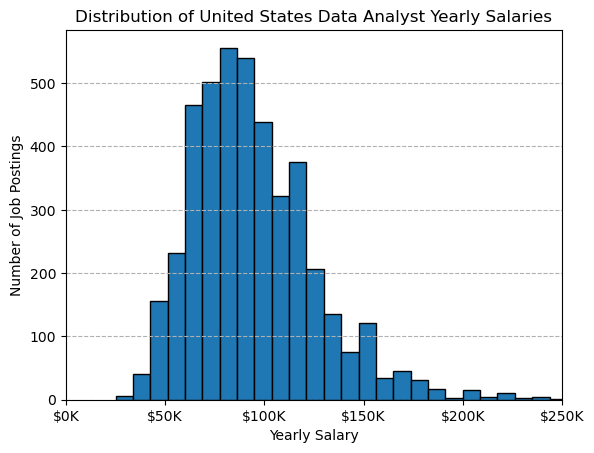

In [16]:
#bins are basically the bars. The more bins (bars) you have, the smaller they are, which gives you a better insight into the data.
#If you have too  many bins (like 100), you starts to  see up & downs within the data set & it's let informative.
df_DA_us['salary_year_avg'].plot(kind='hist', bins = 40, edgecolor = 'black')
plt.xlim(0, 250_000) # cut the x lim short because there wasn't much data beyond 250k$
#below is the code from the last lesson to format the x labels like '$250k' etc
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#Add some titles:
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Job Postings')
plt.grid(axis= 'y', linestyle = '--')
